<a href="https://colab.research.google.com/github/starscreamwashere/Anubhav30.github.io/blob/main/SVC_spamham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv', sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [21]:
df.shape

(5572, 4)

In [22]:
df.size

22288

In [23]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: >

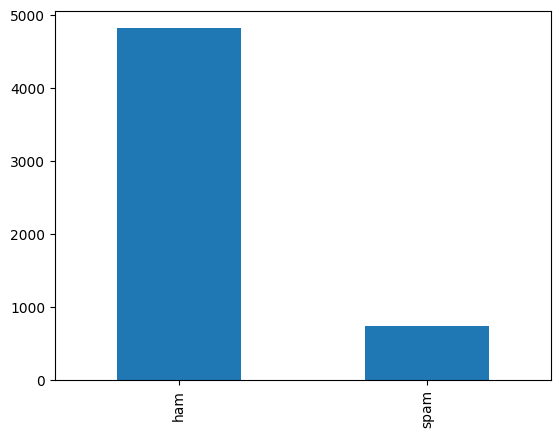

In [24]:
df['label'].value_counts().plot(kind="bar")

In [25]:
x=df.iloc[:,1].values

In [26]:
y=df.iloc[:,0].values

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [28]:
# prompt: write code to import tfidfvectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
x_train_v=vect.fit_transform(x_train)
x_test_v=vect.transform(x_test)

In [29]:
# prompt: write code to import SVC from sklearn

from sklearn.svm import SVC
model=SVC()
model.fit(x_train_v,y_train)

SVC()

In [30]:
y_pred=model.predict(x_test_v)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [31]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [32]:
# prompt:

from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100


98.56424982053123

In [34]:
a=df['message'][10]
a

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [36]:
a=vect.transform([a])

In [37]:
model.predict(a)

array(['ham'], dtype=object)

In [38]:
b=df['message'][100]
b

"Please don't text me anymore. I have nothing else to say."

In [39]:
b=vect.transform([b])

In [40]:
model.predict(b)

array(['ham'], dtype=object)

In [42]:
c="Win tickets to match"
c=vect.transform([c])


In [43]:
model.predict(c)

array(['ham'], dtype=object)

In [44]:
d="win free tickets"
d=vect.transform([d])


In [45]:
model.predict(d)

array(['spam'], dtype=object)

In [48]:
e="dear customer"
e=vect.transform([e])

In [49]:
model.predict(e)

array(['ham'], dtype=object)

In [50]:
mail="How I Got Featured on BBC, $100,000 Opportunity and more"
mail=vect.transform([mail])

In [51]:
model.predict(mail)

array(['ham'], dtype=object)

In [54]:
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [55]:
y_pred_new=text_model.predict(x_test)
y_pred_new

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [56]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_new,y_test)*100

98.56424982053123

In [58]:
a1=df['message'][2]
a1

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [59]:
text_model.predict([a1])

array(['spam'], dtype=object)

In [60]:
#JOBLIB-2 types - DUMP and LOAD
import joblib
joblib.dump(text_model,'spam-ham')
#we r creating a new-model called spam-ham and dumping our pipelined model inside it

['spam-ham']